In [ ]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#logmodel=LogisticRegression()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing dataset
df=pd.read_excel('Bank Marketing Campaign.xlsx')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# data-types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# no. of rows and columns in the dataset
df.shape

(41188, 21)

In [ ]:
# all column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#Some of the variable names are not clear in terms of what they are depicting, so will rename them
#Renaming the column names

#euribor3m : Euribor is shortn for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel 
             #of European banks borrow funds from one another

df.rename(columns = {'age' : 'Age','job':'Job type','marital' : 'Marital status','housing':'Housing Loan','loan':'Personal Loan','default':'Credit default',
                     'contact':'Mode of contact','month':'last contact month','day_of_week':'last contact week','duration':'Contact duration',
                     'poutcome':'Outcome of previous campaign','y':'Client subscribed'}, inplace = True)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
# Checking the proportion of categories of each of the categorical variable

def categories(df):
  cat=pd.DataFrame()
  for col in df:
    if df[col].dtype == 'object':
      cat[col]=display((df[col].value_counts())/(41188))
      print("------------------------------------------------------------")

categories(df)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: Job type, dtype: float64

------------------------------------------------------------


married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: Marital status, dtype: float64

------------------------------------------------------------


university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

------------------------------------------------------------


no         0.791201
unknown    0.208726
yes        0.000073
Name: Credit default, dtype: float64

------------------------------------------------------------


yes        0.523842
no         0.452122
unknown    0.024036
Name: Housing Loan, dtype: float64

------------------------------------------------------------


no         0.824269
yes        0.151695
unknown    0.024036
Name: Personal Loan, dtype: float64

------------------------------------------------------------


cellular     0.634748
telephone    0.365252
Name: Mode of contact, dtype: float64

------------------------------------------------------------


may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: last contact month, dtype: float64

------------------------------------------------------------


thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: last contact week, dtype: float64

------------------------------------------------------------


nonexistent    0.863431
failure        0.103234
success        0.033335
Name: Outcome of previous campaign, dtype: float64

------------------------------------------------------------


no     0.887346
yes    0.112654
Name: Client subscribed, dtype: float64

------------------------------------------------------------


From the proportions above, more than 86% of the observations of "Outcome of previous campaign" falls under 'non-existent" category i.e. they are unknown.
Sine 86% is a very large proportion, so we will prefer to drop this variable.

Another variable 'Credit Default' has 79.12% of the observations falling under 'NO' , 20.87% are unknown and on;y 0.0073 % are 'YES'.
So we prefer to drop this variable too.

In [ ]:
df=df.drop(['Outcome of previous campaign','Credit default'],axis=1)

**Checking Missing Values**

Clearly, we can see that some of the categorical variables have "unknown"  as one of the categories.
And this implies that this dataset has nan values.

Now let us observe this :


In [ ]:
# Making a copy of dataframe

df1=df.copy()

for col in df1:
  if df1[col].dtype == 'object':
    df1[col] = df[col].replace('unknown', np.NaN)

In [ ]:
df1.isna().sum()

Age                      0
Job type               330
Marital status          80
education             1731
Housing Loan           990
Personal Loan          990
Mode of contact          0
last contact month       0
last contact week        0
Contact duration         0
campaign                 0
pdays                    0
previous                 0
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
Client subscribed        0
dtype: int64

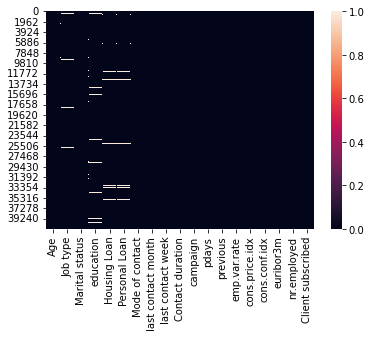

In [ ]:
# Visualizing the null values

sns.heatmap(df1.isnull())
plt.show()

**Data-Imputation**

In [ ]:
# Lets again observe the proportion of categories of categorical variables

categories(df)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: Job type, dtype: float64

------------------------------------------------------------


married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: Marital status, dtype: float64

------------------------------------------------------------


university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

------------------------------------------------------------


yes        0.523842
no         0.452122
unknown    0.024036
Name: Housing Loan, dtype: float64

------------------------------------------------------------


no         0.824269
yes        0.151695
unknown    0.024036
Name: Personal Loan, dtype: float64

------------------------------------------------------------


cellular     0.634748
telephone    0.365252
Name: Mode of contact, dtype: float64

------------------------------------------------------------


may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: last contact month, dtype: float64

------------------------------------------------------------


thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: last contact week, dtype: float64

------------------------------------------------------------


no     0.887346
yes    0.112654
Name: Client subscribed, dtype: float64

------------------------------------------------------------


 **Observations** :

1. Job type has 0.8% unknown values.
2. Marital Status has 1.9% unknown values.
3. Housing Loan has 2.4% unknown values.
4. Personal Loan has 2.4% unknown values.

Since the above variables do not have much unknowns, so we simply replace them with their modes.

In [ ]:
print('Job type:',df['Job type'].mode())
print('Marital status:',df['Marital status'].mode())
print('Housing Loan:',df['Housing Loan'].mode())
print('Personal Loan:',df['Personal Loan'].mode())

Job type: 0    admin.
dtype: object
Marital status: 0    married
dtype: object
Housing Loan: 0    yes
dtype: object
Personal Loan: 0    no
dtype: object


In [ ]:
# Replacing unknowns by their modes

df['Job type'] = df['Job type'].replace({'unknown': 'admin.'})
df['Marital status']=df['Marital status'].replace({'unknown':'married'})
df['Personal Loan']=df['Personal Loan'].replace({'unknown':'no'})
df['Housing Loan']=df['Housing Loan'].replace({'unknown':'yes'})

Education has around **4.2%** unknown observations.
We will randomly select one of the education categories and put it in place of unknown. 

In [ ]:
random=df['education'].sample()
random

11801    professional.course
Name: education, dtype: object

In [ ]:
df['education']=df['education'].replace({'unknown': 'high.school'})

In [ ]:
# Making another copy of dataframe

df2=df.copy()

for col in df2:
  if df2[col].dtype == 'object':
    df2[col] = df[col].replace('unknown', np.NaN)

In [ ]:
df2.isna().sum()

Age                   0
Job type              0
Marital status        0
education             0
Housing Loan          0
Personal Loan         0
Mode of contact       0
last contact month    0
last contact week     0
Contact duration      0
campaign              0
pdays                 0
previous              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
Client subscribed     0
dtype: int64

###### We do not have any missing/unknown values in our dataset now.

Now, lets move onto Univariate and Bi-variate Analysis

**UNIVARIATE ANALYSIS**

We are now left with 19 variables in the dataset.Lets observe the statistical behaviour of each of them.

In [ ]:
def univarstats(df):
  univar_df=pd.DataFrame(columns=['Count','Missing','No. of Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max',
                                  'Std','Skewness','Kurtosis'])

  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      univar_df.loc[col]=[df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                          df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),
                          df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
    else:
      univar_df.loc[col]=[df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                          df[col].mode().values[0],'-','-','-','-','-','-','-','-','-']
                        
  return univar_df.sort_values(by=['Numeric','Skewness','Kurtosis'],ascending=False)

  pd.set_option('display.max_rows',100)
  pd.set_option('display.max_columns',100)

In [ ]:
univarstats(df)

,Count,Missing,No. of Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skewness,Kurtosis
campaign,41188,0,42,int64,True,1,2.567593,1,1.0,2.0,3.0,56,2.770014,4.762507,36.979795
previous,41188,0,8,int64,True,0,0.172963,0,0.0,0.0,0.0,7,0.494901,3.832042,20.108816
Contact duration,41188,0,1544,int64,True,85,258.28501,0,102.0,180.0,319.0,4918,259.279249,3.263141,20.247938
Age,41188,0,78,int64,True,31,40.02406,17,32.0,38.0,47.0,98,10.42125,0.784697,0.791312
cons.conf.idx,41188,0,26,float64,True,-36.4,-40.5026,-50.8,-42.7,-41.8,-36.4,-26.9,4.628198,0.30318,-0.358558
cons.price.idx,41188,0,26,float64,True,93.994,93.575664,92.201,93.075,93.749,93.994,94.767,0.57884,-0.230888,-0.829809
euribor3m,41188,0,316,float64,True,4.857,3.621291,0.634,1.344,4.857,4.961,5.045,1.734447,-0.709188,-1.406803
emp.var.rate,41188,0,10,float64,True,1.4,0.081886,-3.4,-1.8,1.1,1.4,1.4,1.57096,-0.724096,-1.062632
nr.employed,41188,0,11,float64,True,5228.1,5167.035911,4963.6,5099.1,5191.0,5228.1,5228.1,72.251528,-1.044262,-0.00376
pdays,41188,0,27,int64,True,999,962.475454,0,999.0,999.0,999.0,999,186.910907,-4.92219,22.229463


**Observations:**



1. Numeric variables- Campaign, previous, Contact duration are highly positively skewed which may be due to presence of outliers.
2. Numeric variables - pdays,Campaign, previous, Contact duration have high kurtosis which depicts the non-normal nature of these variables.
3. Age,campaign,cons.conf.idx,contact duration have high difference between Q3(75%) and Q4(max) which also points towards presence of outliers.

Now lets cross-check the above observations by visualizing the data.


In [ ]:
#Separataing the numeric and categorical variables

num_var = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64' ]
cat_var = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
print(num_var)
print(cat_var)

['Age', 'Contact duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['Job type', 'Marital status', 'education', 'Housing Loan', 'Personal Loan', 'Mode of contact', 'last contact month', 'last contact week', 'Client subscribed']


**Box-plot**

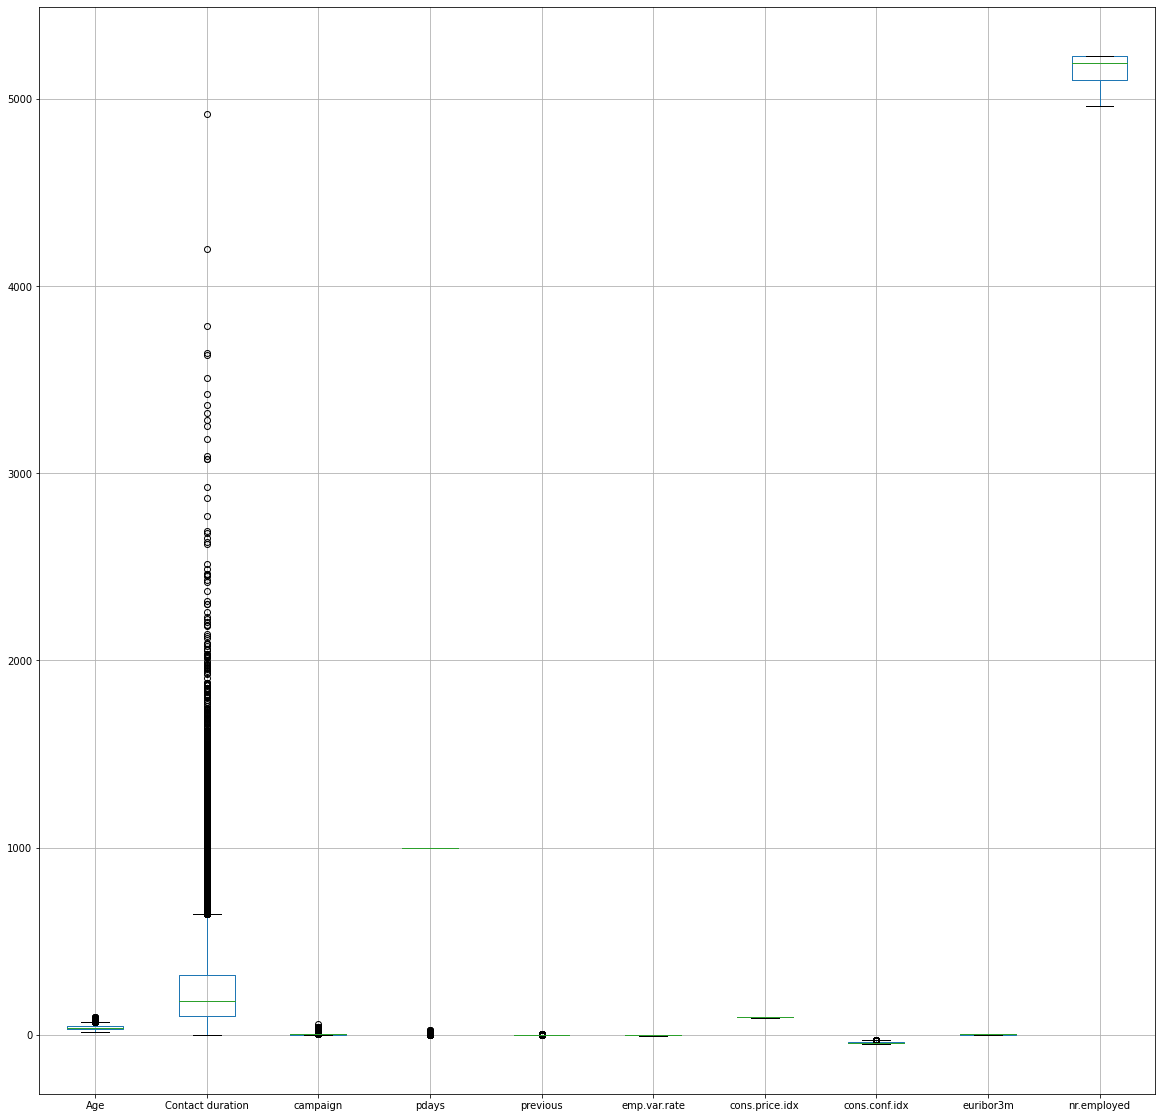

In [ ]:
plt.figure(figsize=(20,20))
df.boxplot()

Clearly, boxplot shows that Age, Contact duration ,Campaign ,pdays and cons.conf.idx have outliers.
We will deal with these outliers later on.

**Distribution plots**

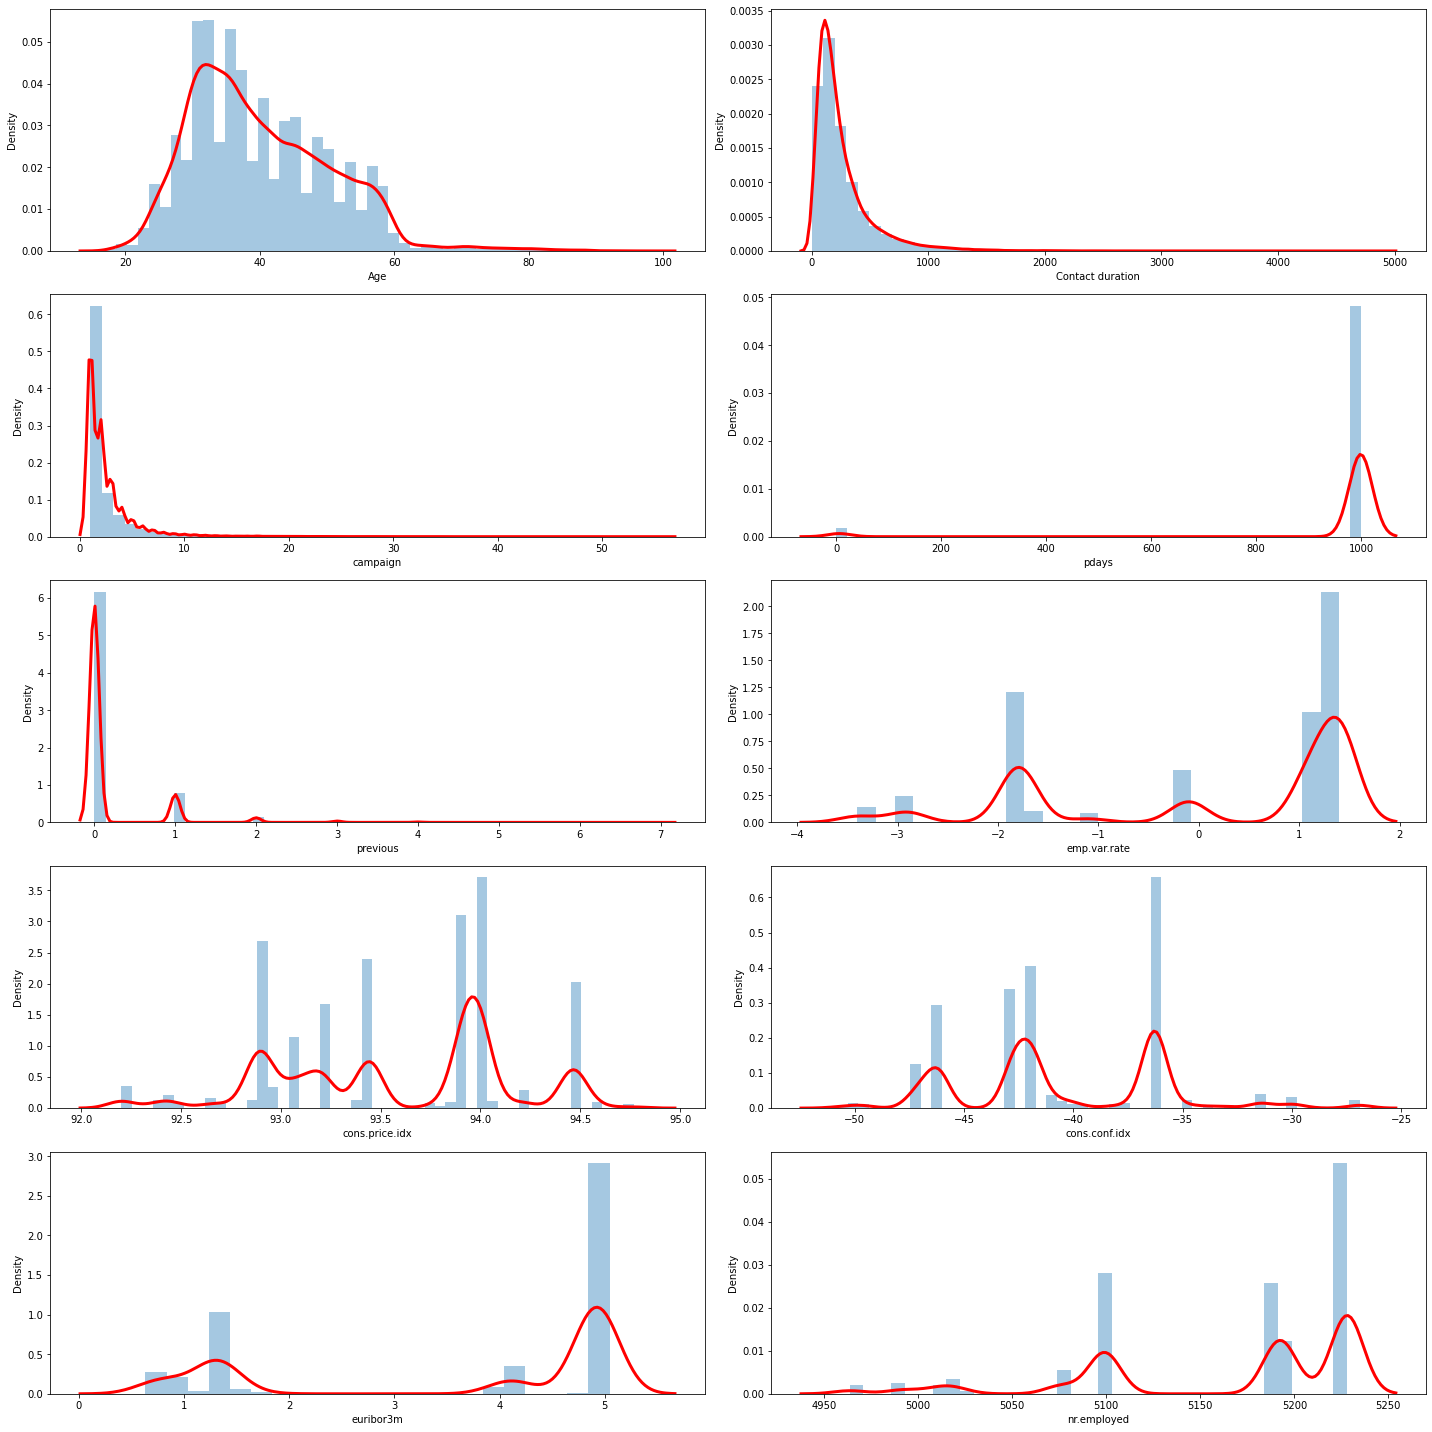

In [ ]:
rows=5
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20));
col=num_var
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,'color':'red'});
        index+=1
        if index>9:
            break
plt.tight_layout();
plt.show();

**Observations:**

1. Contact duration,campaign,previous are highly positively skewed
2. pdays is highly negatively skewed.
3. socio-economic variables have many modes which may be due to small number of unique values they are taking.
4. Age has distorted bell shape with tail at the right depicting the presence of ouliers.

So, none of the numeric variables have normal distribution.


**Count-plots wrt target variables**

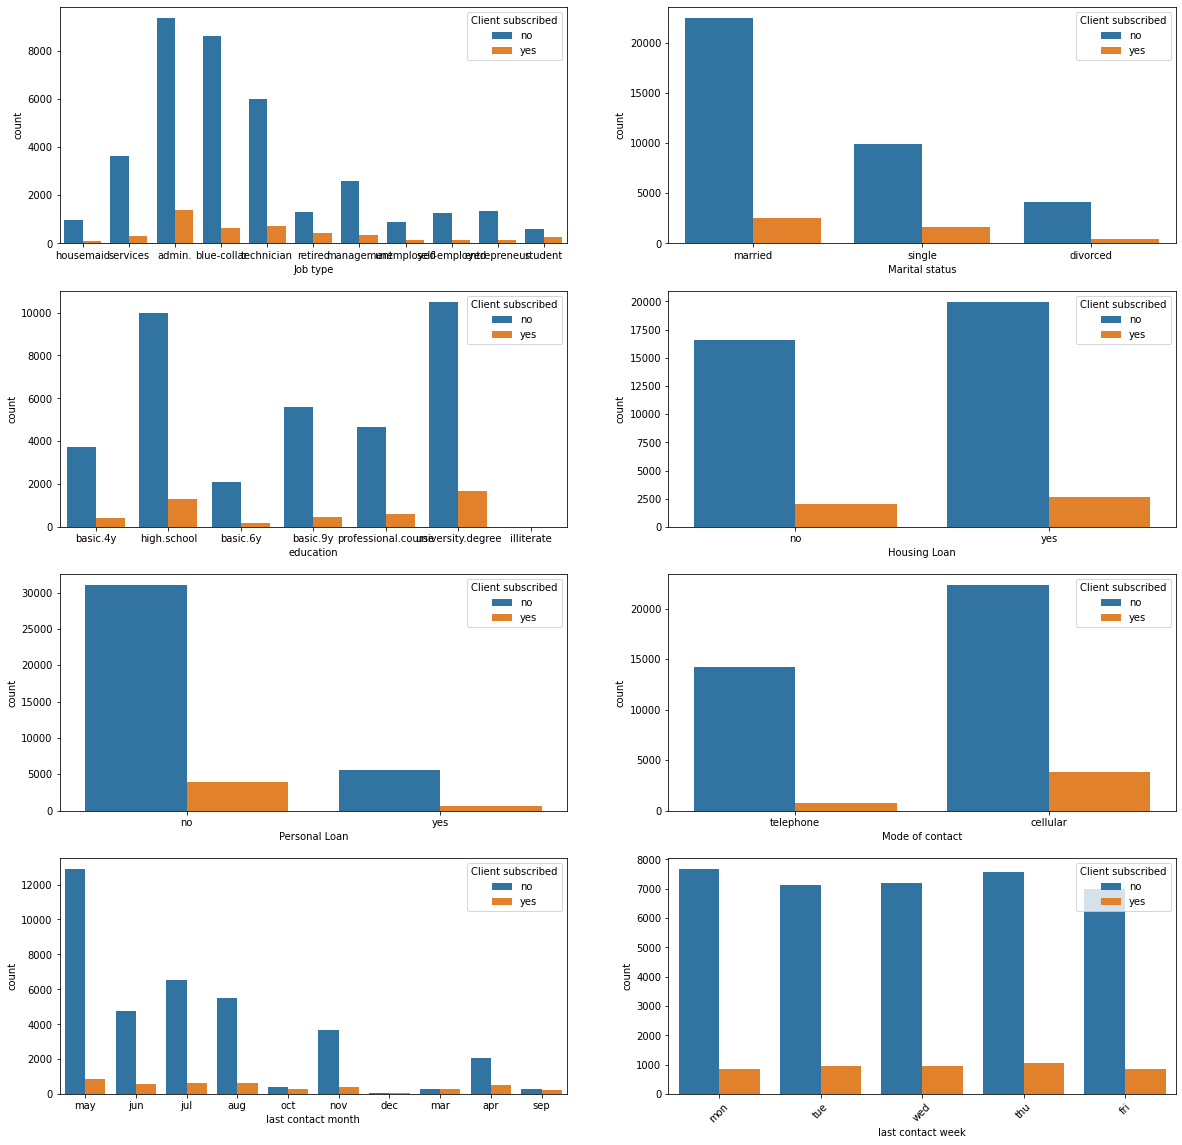

In [ ]:
rows=4
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20));
col=cat_var
index=0
for i in range(rows):
    for j in range(cols):
        sns.countplot(df[col[index]],hue=df['Client subscribed'],ax=ax[i][j]);
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        index+=1
        if index>8:
            break
#plt.tight_layout();
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)

plt.show();

*Observations*

**Bi-variate Analysis**

In [ ]:
df.corr()

,Age,Contact duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
Age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
Contact duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


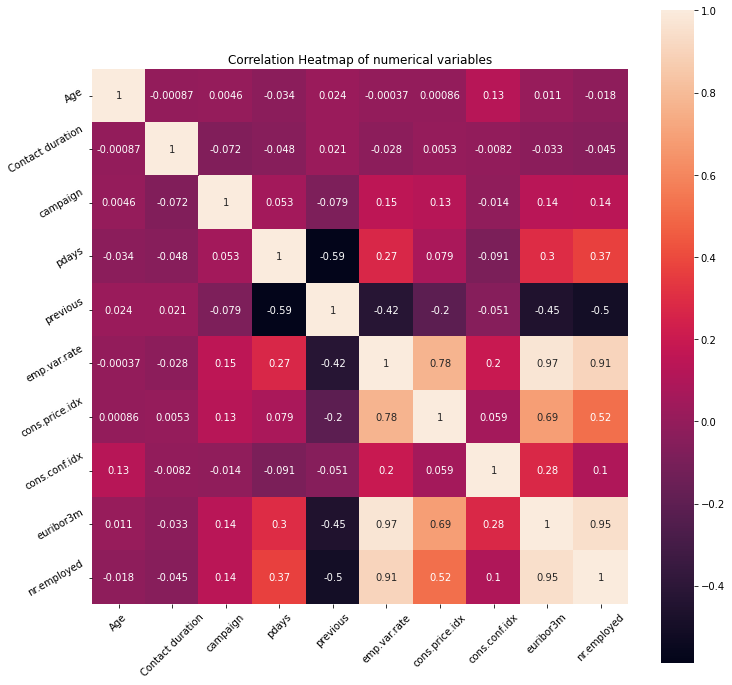

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap of numerical variables')
ax = sns.heatmap(df.corr(), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Observations**



1. euribor3m has high positive correlation with emp.var.rate and nr.employed
2. emp.var.rate and nr.employed are also highly positively correlated.
3. previous and pdays have intermediate negative correlation of -0.59.




***Now lets observe the relation of numerical variable with categorical variables***

In [ ]:
## Function for ANOVA

def anova(df,col,label):
  groups = df[col].unique()
  group_labels= []
  for g in groups:
    group_labels.append(df[df[col]== g][label])

  #Now calculating ANOVA Results
  return(stats.f_oneway(*group_labels))

#user-defined function

def bivarstats(df,label):

# Create an empty DataFrame to store bivariate stats
  bivar_df=pd.DataFrame(columns=['stats','sign(+/-)','Effect size','p-value'])

  for col in df:
   if not col == label:
    if df[col].isnull().sum() == 0:
      if pd.api.types.is_object_dtype(df[col]):
        F,p = anova(df[[col,label]],col,label)
        bivar_df.loc[col]=['F',np.sign(F),abs(round(F,4)),round(p,4)]
    else:
        bivar_df.loc[col]=[np.nan,np.nan,np.nan,np.nan]
      
  return bivar_df.sort_values(by=['Effect size','stats'],ascending=[False,False]) 




In [ ]:
print(num_var)

['Age', 'Contact duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
bivarstats(df,'Age')

,stats,sign(+/-),Effect size,p-value
Marital status,F,1.0,4379.5717,0.0000
Job type,F,1.0,1379.3068,0.0000
education,F,1.0,455.6162,0.0000
last contact month,F,1.0,74.1520,0.0000
Client subscribed,F,1.0,38.0947,0.0000
last contact week,F,1.0,14.7763,0.0000
Personal Loan,F,1.0,2.1341,0.1441
Mode of contact,F,1.0,2.0303,0.1542
Housing Loan,F,1.0,0.1269,0.7217


######Age has significant relationship with Marital status,Job type,Education,last contact month,last contact week and Client subscribed.

In [ ]:
bivarstats(df,'Contact duration')

,stats,sign(+/-),Effect size,p-value
Client subscribed,F,1.0,8094.1016,0.0000
Mode of contact,F,1.0,29.2870,0.0000
last contact month,F,1.0,23.3476,0.0000
last contact week,F,1.0,8.8847,0.0000
Job type,F,1.0,3.2999,0.0003
Housing Loan,F,1.0,2.8608,0.0908
education,F,1.0,2.2345,0.0370
Marital status,F,1.0,1.6793,0.1865
Personal Loan,F,1.0,0.0006,0.9804


As per the data, Contact duration has significant relationship with Client subscribed,Mode of contact,last contact month,last contact week and Job tytpe

In [ ]:
bivarstats(df,'campaign')

,stats,sign(+/-),Effect size,p-value
Mode of contact,F,1.0,248.0131,0.0000
Client subscribed,F,1.0,182.1567,0.0000
last contact month,F,1.0,121.3850,0.0000
last contact week,F,1.0,16.7529,0.0000
Housing Loan,F,1.0,4.9472,0.0261
Job type,F,1.0,3.6990,0.0001
Marital status,F,1.0,1.5756,0.2069
Personal Loan,F,1.0,1.1545,0.2826
education,F,1.0,0.3511,0.9096


#####Age has significant relationship with Mode of contact,last contact month,last contact week and Client subscribed.

In [ ]:
bivarstats(df,'pdays')

,stats,sign(+/-),Effect size,p-value
Client subscribed,F,1.0,4861.1733,0.0000
Mode of contact,F,1.0,581.2750,0.0000
last contact month,F,1.0,280.3046,0.0000
Job type,F,1.0,83.4979,0.0000
Marital status,F,1.0,36.5386,0.0000
education,F,1.0,18.5769,0.0000
Housing Loan,F,1.0,4.2274,0.0398
last contact week,F,1.0,2.5885,0.0349
Personal Loan,F,1.0,0.0003,0.9861


pdays is significantly related with all other categorical variables except Personal Loan.

In [ ]:
bivarstats(df,'previous')

,stats,sign(+/-),Effect size,p-value
Client subscribed,F,1.0,2304.2571,0.0000
Mode of contact,F,1.0,1954.4424,0.0000
last contact month,F,1.0,391.1831,0.0000
Job type,F,1.0,76.6053,0.0000
Marital status,F,1.0,49.8113,0.0000
Housing Loan,F,1.0,19.3626,0.0000
education,F,1.0,15.3654,0.0000
last contact week,F,1.0,0.3410,0.8504
Personal Loan,F,1.0,0.1892,0.6636


 previous is significantly related with all other categorical variables except Personal Loan and last contact week.

In [ ]:
bivarstats(df,'emp.var.rate')

,stats,sign(+/-),Effect size,p-value
Mode of contact,F,1.0,7549.5627,0.0000
Client subscribed,F,1.0,4023.8299,0.0000
last contact month,F,1.0,2420.0097,0.0000
Marital status,F,1.0,205.7747,0.0000
Job type,F,1.0,158.6131,0.0000
Housing Loan,F,1.0,144.3612,0.0000
education,F,1.0,25.5170,0.0000
last contact week,F,1.0,12.8211,0.0000
Personal Loan,F,1.0,0.0586,0.8088


In [ ]:
bivarstats(df,'cons.price.idx')

,stats,sign(+/-),Effect size,p-value
Mode of contact,F,1.0,22161.5852,0.0000
last contact month,F,1.0,2688.3153,0.0000
Client subscribed,F,1.0,778.5898,0.0000
Housing Loan,F,1.0,246.7375,0.0000
Marital status,F,1.0,82.6313,0.0000
education,F,1.0,72.0296,0.0000
Job type,F,1.0,60.1662,0.0000
last contact week,F,1.0,3.7609,0.0046
Personal Loan,F,1.0,1.4550,0.2277


In [ ]:
bivarstats(df,'cons.conf.idx')

,stats,sign(+/-),Effect size,p-value
Mode of contact,F,1.0,2783.7017,0.0000
last contact month,F,1.0,2744.8158,0.0000
Client subscribed,F,1.0,124.4100,0.0000
Job type,F,1.0,102.5041,0.0000
Marital status,F,1.0,82.5071,0.0000
education,F,1.0,80.8439,0.0000
last contact week,F,1.0,45.9533,0.0000
Housing Loan,F,1.0,43.2500,0.0000
Personal Loan,F,1.0,7.7008,0.0055


In [ ]:
bivarstats(df,'euribor3m')

,stats,sign(+/-),Effect size,p-value
Mode of contact,F,1.0,7834.3602,0.0000
Client subscribed,F,1.0,4309.4790,0.0000
last contact month,F,1.0,2296.8116,0.0000
Marital status,F,1.0,250.3609,0.0000
Job type,F,1.0,160.8561,0.0000
Housing Loan,F,1.0,140.1409,0.0000
last contact week,F,1.0,19.7863,0.0000
education,F,1.0,19.3193,0.0000
Personal Loan,F,1.0,0.0098,0.9213


In [ ]:
bivarstats(df,'nr.employed')

,stats,sign(+/-),Effect size,p-value
Client subscribed,F,1.0,5926.6106,0.0000
last contact month,F,1.0,3317.6287,0.0000
Mode of contact,F,1.0,3216.7419,0.0000
Job type,F,1.0,220.9736,0.0000
Marital status,F,1.0,218.4637,0.0000
Housing Loan,F,1.0,85.7796,0.0000
education,F,1.0,21.2463,0.0000
last contact week,F,1.0,9.2282,0.0000
Personal Loan,F,1.0,0.7283,0.3934


All the socio-economic variables are significantly related with all the categorical variables except Personal Loan.

**Observations:**

1.All numeric variables are significantly related with response variable 'Client subscribed' which is a very good thing.

2.None of the numerical variables are related with PersonaL Loan as per the given data.



**Categorical Encoding**

In [ ]:
# Categorical variables having 2 categories(Housing loan,Personal loan,Mode of contact),can simply be replaced by 0's and 1's using replace function

df['Personal Loan']=df['Personal Loan'].replace({'no':0,'yes':1}).astype('int')
df['Housing Loan']=df['Housing Loan'].replace({'no':0,'yes':1}).astype('int')
df['Mode of contact']=df['Mode of contact'].replace({'telephone':0,'cellular':1}).astype('int')



In [ ]:
# We have 8 levels of education, so we will replace these levels by years of education and hence making it a numetric variable

df['education']=df['education'].replace({'illiterate':0,'basic.4y':4,'basic.6y':6,'basic.9y':9,'high.school':12,'university.degree':15,'professional.course':17})
df['education']=df['education'].astype('int')                   

In [ ]:
# For rest of the Categorical variables with more than 2 categories, we will use One-Hot Encoding using get_dummies function

categorical_cols1= ['Job type','Marital status','last contact month','last contact week']

 # Creating a new dataframe

df_encoded=pd.get_dummies(df, columns = categorical_cols1, drop_first=True)


In [ ]:
# For the response variable - Client subscribed, we use Label Encoder

le=LabelEncoder()
df_encoded['Client subscribed']=le.fit_transform(df_encoded['Client subscribed'])
df_encoded['Client subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Client subscribed, Length: 41188, dtype: int64

In [ ]:
df_encoded.shape

(41188, 40)

In [ ]:
df_encoded.columns

Index(['Age', 'education', 'Housing Loan', 'Personal Loan', 'Mode of contact',
       'Contact duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'Client subscribed', 'Job type_blue-collar', 'Job type_entrepreneur',
       'Job type_housemaid', 'Job type_management', 'Job type_retired',
       'Job type_self-employed', 'Job type_services', 'Job type_student',
       'Job type_technician', 'Job type_unemployed', 'Marital status_married',
       'Marital status_single', 'last contact month_aug',
       'last contact month_dec', 'last contact month_jul',
       'last contact month_jun', 'last contact month_mar',
       'last contact month_may', 'last contact month_nov',
       'last contact month_oct', 'last contact month_sep',
       'last contact week_mon', 'last contact week_thu',
       'last contact week_tue', 'last contact week_wed'],
      dtype='object')

In [ ]:
df_encoded.head()

,Age,education,Housing Loan,Personal Loan,Mode of contact,Contact duration,campaign,pdays,previous,emp.var.rate,...,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep,last contact week_mon,last contact week_thu,last contact week_tue,last contact week_wed
0,56,4,0,0,0,261,1,999,0,1.1,...,0,0,1,0,0,0,1,0,0,0
1,57,12,0,0,0,149,1,999,0,1.1,...,0,0,1,0,0,0,1,0,0,0
2,37,12,1,0,0,226,1,999,0,1.1,...,0,0,1,0,0,0,1,0,0,0
3,40,6,0,0,0,151,1,999,0,1.1,...,0,0,1,0,0,0,1,0,0,0
4,56,12,0,1,0,307,1,999,0,1.1,...,0,0,1,0,0,0,1,0,0,0


**Checking Multi-collinearity**

We always check for multi-collinearity in the numerical variables and we will be using Variance Inflation Factor and Variance Decomposition method for checking the same.

**Variance Inflation Factor**

In [ ]:
# After scaling the data

scaler=StandardScaler()
scaler.fit(df[num_var])
df_scaled=pd.DataFrame(scaler.transform(df[num_var]), columns=num_var)

  
# Creating a dataframe   
vif_df = pd.DataFrame()
vif_df["Variable"] = num_var

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# calculating VIF for each numerical variable
vif_df["VIF"] = [variance_inflation_factor(df_scaled[num_var].values, i) for i in range(len(num_var))]
  
print(vif_df.sort_values(by=['VIF']))

           Variable        VIF
1  Contact duration   1.009454
0               Age   1.018879
2          campaign   1.038426
3             pdays   1.614851
4          previous   1.796659
7     cons.conf.idx   2.649719
6    cons.price.idx   6.338250
9       nr.employed  31.676267
5      emp.var.rate  33.070187
8         euribor3m  64.350349


**nr.employed,emp.var.rate and euribor3m** have high VIF's which depicts that they are involved in multi-collinearity.

In [ ]:
df_scaled

,Age,Contact duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [ ]:
df_y=df_encoded['Client subscribed']
merge = [df_scaled,df_y]
df_r=pd.concat(merge,axis=1)

In [ ]:
df_r

,Age,Contact duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Client subscribed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


Lets us confirm the same using VDM

**Variance Decomposition Method**

We are using R software for Variance Decomposition

In [ ]:
#from google.colab import files

In [ ]:
#df_r.to_csv("Bank_r.csv")
#files.download("Bank_r.csv")

#### R codes for Variance decomposition method

data<-data.frame(read.csv(file.choose(),header=T))
data
data<-data[-1]
attach(data)

library(MASS)
library(tidyverse)

model<- glm(y ~ Age+Contact_duration+campaign+pdays + previous + emp.var.rate+ cons.price.idx + cons.conf.idx+ euribor3m + nr.employed, 
            family=binomial(link='logit'),data=data)
summary(model)

library(mctest)

###### with Intercept term
eigprop(model)

###### without Intercept term
eigprop(model, Inter = FALSE)



**Observations:**



1. emp.var.rate and cons.price.idx with condition index 12.51 seems to be causing multicollinearity.
2. nr.employed,euribor3m,cons.conf.idx with condition index 19.1666 seems to be involved in multicollinearity.
3. pdays and previous also seems to be involved in multicollinearity. 


Earlier analysis also showed similar results, so we will drop pdays and nr.employed from the dataset.


In [ ]:
df_clean=df_encoded.drop(['pdays','nr.employed'],axis=1)

In [ ]:
df_clean

,Age,education,Housing Loan,Personal Loan,Mode of contact,Contact duration,campaign,previous,emp.var.rate,cons.price.idx,...,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep,last contact week_mon,last contact week_thu,last contact week_tue,last contact week_wed
0,56,4,0,0,0,261,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
1,57,12,0,0,0,149,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
2,37,12,1,0,0,226,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
3,40,6,0,0,0,151,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
4,56,12,0,1,0,307,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,17,1,0,1,334,1,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41184,46,17,0,0,1,383,1,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41185,56,15,1,0,1,189,2,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41186,44,17,0,0,1,442,1,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_clean.columns

Index(['Age', 'education', 'Housing Loan', 'Personal Loan', 'Mode of contact',
       'Contact duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'Client subscribed',
       'Job type_blue-collar', 'Job type_entrepreneur', 'Job type_housemaid',
       'Job type_management', 'Job type_retired', 'Job type_self-employed',
       'Job type_services', 'Job type_student', 'Job type_technician',
       'Job type_unemployed', 'Marital status_married',
       'Marital status_single', 'last contact month_aug',
       'last contact month_dec', 'last contact month_jul',
       'last contact month_jun', 'last contact month_mar',
       'last contact month_may', 'last contact month_nov',
       'last contact month_oct', 'last contact month_sep',
       'last contact week_mon', 'last contact week_thu',
       'last contact week_tue', 'last contact week_wed'],
      dtype='object')

**Outlier Detection**

In [ ]:
num_var1= ['Age','education','Contact duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m']


In [ ]:
#Removing Outliers from the numerical columns of the dataset
Q1 = df_clean[num_var1].quantile(0.25)
Q3 = df_clean[num_var1].quantile(0.75)
IQR = Q3 - Q1

pd.concat([Q1, Q3, IQR], axis=1, keys= ['Q1', 'Q3', 'IQR'])

,Q1,Q3,IQR
Age,32.000,47.000,15.000
education,9.000,15.000,6.000
Contact duration,102.000,319.000,217.000
campaign,1.000,3.000,2.000
previous,0.000,0.000,0.000
emp.var.rate,-1.800,1.400,3.200
cons.price.idx,93.075,93.994,0.919
cons.conf.idx,-42.700,-36.400,6.300
euribor3m,1.344,4.961,3.617


In [ ]:
out_df = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean> (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
out_df.shape

(30360, 38)

In [ ]:
out_df

,Age,education,Housing Loan,Personal Loan,Mode of contact,Contact duration,campaign,previous,emp.var.rate,cons.price.idx,...,last contact month_jun,last contact month_mar,last contact month_may,last contact month_nov,last contact month_oct,last contact month_sep,last contact week_mon,last contact week_thu,last contact week_tue,last contact week_wed
0,56,4,0,0,0,261,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
1,57,12,0,0,0,149,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
2,37,12,1,0,0,226,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
3,40,6,0,0,0,151,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
4,56,12,0,1,0,307,1,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,15,0,0,1,254,2,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41181,37,15,1,0,1,281,1,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41184,46,17,0,0,1,383,1,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0
41185,56,15,1,0,1,189,2,0,-1.1,94.767,...,0,0,0,1,0,0,0,0,0,0


####  Using the method of IQR is leading to removal of more than 10,000 rows which is not acceptable. So , we will transform our data to remove the Outliers

In [ ]:
# Transforming the numerical variables using Standard Scaler

scaler=StandardScaler()
scaler.fit(df_clean[num_var1])
df_scaled_1=pd.DataFrame(scaler.transform(df_clean[num_var1]), columns=num_var1)

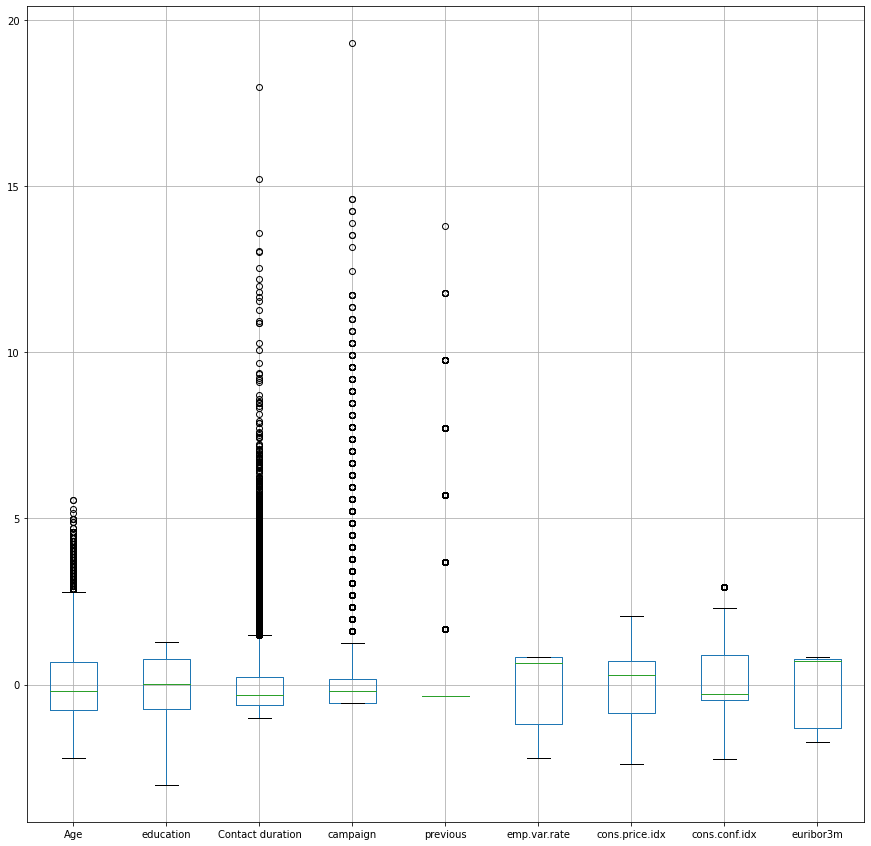

In [ ]:
plt.figure(figsize=(15,15))
df_scaled_1.boxplot()

In [ ]:
# we still have many outliers in Age, Contact duration and Campaign
# Lets apply log transformation on these particular variables

In [ ]:
df_clean["Log_age"] = df_clean["Age"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_clean['Age'].skew())
print(df_clean['Log_age'].skew())

0.7846968157646645
0.1258388128756888


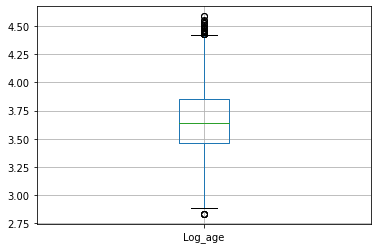

In [ ]:
pd.DataFrame(df_clean['Log_age']).boxplot()

In [ ]:
df_clean["Log_Contact_duration"] = df_clean["Contact duration"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_clean['Contact duration'].skew())
print(df_clean['Log_Contact_duration'].skew())

3.263141255262832
-0.47271052569293415


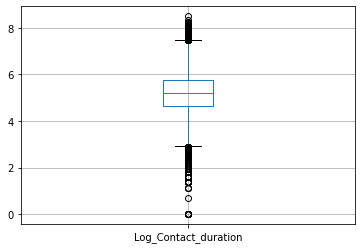

In [ ]:
pd.DataFrame(df_clean['Log_Contact_duration']).boxplot()

In [ ]:
df_clean["Log_campaign"] = df_clean["campaign"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_clean['campaign'].skew())
print(df_clean['Log_campaign'].skew())

4.762506697067009
0.9189220624382018


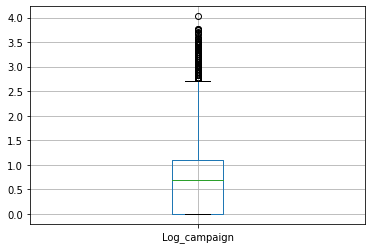

In [ ]:
pd.DataFrame(df_clean['Log_campaign']).boxplot()

In [ ]:
# Skewness has reduced after applying log transformation. Also, outliers have been removed to some extent.

In [ ]:
df_clean1=df_clean.drop(['Age','campaign','Contact duration','education','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m'],axis=1)
df_clean2=df_scaled_1[['education','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]

In [ ]:
merge = [df_clean1,df_clean2]
df_final=pd.concat(merge,axis=1)

In [ ]:
#df_final.to_csv('C:\\Users\\harshita\\Downloads\\reg1.csv')


In [ ]:
df_final

,Housing Loan,Personal Loan,Mode of contact,Client subscribed,Job type_blue-collar,Job type_entrepreneur,Job type_housemaid,Job type_management,Job type_retired,Job type_self-employed,...,last contact week_wed,Log_age,Log_Contact_duration,Log_campaign,education,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,0,0,0,0,0,0,1,0,0,0,...,0,4.025352,5.564520,0.000000,-2.001107,-0.349494,0.648092,0.722722,0.886447,0.712460
1,0,0,0,0,0,0,0,0,0,0,...,0,4.043051,5.003946,0.000000,0.017101,-0.349494,0.648092,0.722722,0.886447,0.712460
2,1,0,0,0,0,0,0,0,0,0,...,0,3.610918,5.420535,0.000000,0.017101,-0.349494,0.648092,0.722722,0.886447,0.712460
3,0,0,0,0,0,0,0,0,0,0,...,0,3.688879,5.017280,0.000000,-1.496555,-0.349494,0.648092,0.722722,0.886447,0.712460
4,0,1,0,0,0,0,0,0,0,0,...,0,4.025352,5.726848,0.000000,0.017101,-0.349494,0.648092,0.722722,0.886447,0.712460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,1,1,0,0,0,0,1,0,...,0,4.290459,5.811141,0.000000,1.278481,-0.349494,-0.752343,2.058168,-2.224953,-1.495186
41184,0,0,1,0,1,0,0,0,0,0,...,0,3.828641,5.948035,0.000000,1.278481,-0.349494,-0.752343,2.058168,-2.224953,-1.495186
41185,1,0,1,0,0,0,0,0,1,0,...,0,4.025352,5.241747,0.693147,0.773929,-0.349494,-0.752343,2.058168,-2.224953,-1.495186
41186,0,0,1,1,0,0,0,0,0,0,...,0,3.784190,6.091310,0.000000,1.278481,-0.349494,-0.752343,2.058168,-2.224953,-1.495186


In [ ]:
X = df_final.drop(['Client subscribed'],axis=1)
Y = df_final['Client subscribed'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

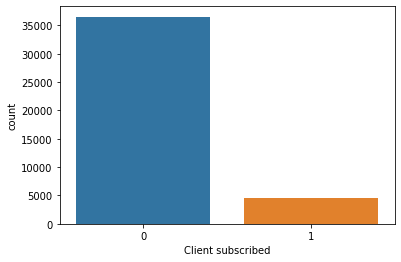

In [ ]:
sns.countplot(df_final['Client subscribed'])

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 27404, 1: 3487})

In [ ]:
!pip install imblearn

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

df_ns = pd.concat([X_train_ns,y_train_ns],axis=1)

print(" The number of classes before fit{}".format(Counter(y_train)))
print(" The number of classes after fit{}".format(Counter(y_train_ns)))

 The number of classes before fitCounter({0: 27404, 1: 3487})
 The number of classes after fitCounter({0: 4358, 1: 3487})


####Under-sampling
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

The number of classes before fitCounter({0: 27404, 1: 3487})
The number of classes after fitCounter({0: 4358, 1: 3487})

####Over-sampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy='minority')
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

After OverSampling, counts of label '1': 27404
After OverSampling, counts of label '0': 27404

#####SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train

After SMOTE, counts of label '1': 27404
After SMOTE, counts of label '0': 27404

In [ ]:
df_ns.shape

(7845, 38)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy='minority')
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

df_os = pd.concat([X_train_os,y_train_os],axis=1)

print(" The number of classes before fit{}".format(Counter(y_train)))
print(" The number of classes after fit{}".format(Counter(y_train_os)))

print('After OverSampling, the shape of X_train: {}'.format(X_train_os.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_os.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os == 0)))

 The number of classes before fitCounter({0: 27404, 1: 3487})
 The number of classes after fitCounter({0: 27404, 1: 27404})
After OverSampling, the shape of X_train: (54808, 37)
After OverSampling, the shape of y_train: (54808,) 

After OverSampling, counts of label '1': 27404
After OverSampling, counts of label '0': 27404


In [ ]:
df_os.shape

(54808, 38)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

df_sm = pd.concat([X_train_sm,y_train_sm],axis=1)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of label '1': 3487
Before OverSampling, counts of label '0': 27404 

After OverSampling, the shape of train_X: (54808, 37)
After OverSampling, the shape of train_y: (54808,) 

After OverSampling, counts of label '1': 27404
After OverSampling, counts of label '0': 27404


In [ ]:
X_train=X_train.drop(['education'],axis=1)
X_train_ns=X_train_ns.drop(['education'],axis=1)
X_train_os=X_train_os.drop(['education'],axis=1)
X_train_sm=X_train_sm.drop(['education'],axis=1)
X_test=X_test.drop(['education'],axis=1)

In [ ]:
df_sm.shape

(54808, 38)

In [ ]:
#.to_csv('C:\\Users\\harshita\\Downloads\\reg_ns.csv')

In [ ]:
#df_os.to_csv('C:\\Users\\harshita\\Downloads\\reg_os.csv')

In [ ]:
#df_sm.to_csv('C:\\Users\\harshita\\Downloads\\reg_sm.csv')

In [ ]:
df_final.drop(['Education'],axis=1).columns

KeyError: ignored

## Logistic Model

Train set accuracy:  0.9082904405813991
Test set accuracy:  0.9079343498106245
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9144
           1       0.64      0.40      0.49      1153

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.72     10297
weighted avg       0.90      0.91      0.90     10297



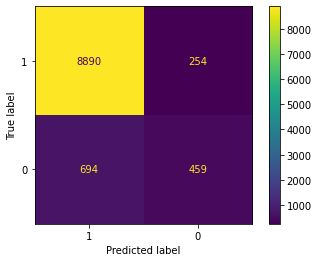

In [ ]:
## Without data balancing

logmodel=LogisticRegression()

logmodel.fit(X_train,y_train)
y_pred_l1=logmodel.predict(X_test)
y_pred_train_l1=logmodel.predict(X_train)

cm=confusion_matrix(y_test,y_pred_l1)
cmd=ConfusionMatrixDisplay(cm,display_labels=['1','0'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_l1))
print('Test set accuracy: ',accuracy_score(y_test,y_pred_l1))

print(classification_report(y_test,y_pred_l1))

Train set accuracy:  0.8655271762001877
Test set accuracyt:  0.8705448188792853
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9144
           1       0.45      0.74      0.56      1153

    accuracy                           0.87     10297
   macro avg       0.71      0.81      0.74     10297
weighted avg       0.91      0.87      0.88     10297



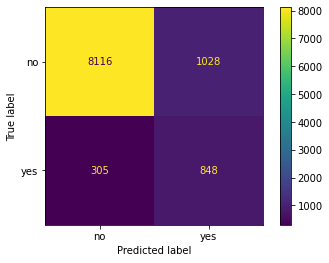

In [ ]:
# After Under-sampling

logmodel.fit(X_train_ns,y_train_ns)
y_pred_l2=logmodel.predict(X_test)
y_pred_train_l2=logmodel.predict(X_train)
cm=confusion_matrix(y_test,y_pred_l2)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_l2))
print('Test set accuracyt: ',accuracy_score(y_test,y_pred_l2))
print(classification_report(y_test,y_pred_l2))

Train set accuracy:  0.8547473374121912
Test set accuracy: 0.8570457414781004
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      9144
           1       0.43      0.90      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.88      0.75     10297
weighted avg       0.92      0.86      0.88     10297



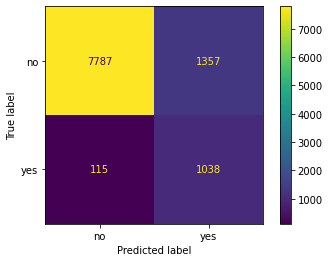

In [ ]:
# After Over-sampling

logmodel.fit(X_train_os,y_train_os)
y_pred_l3=logmodel.predict(X_test)
y_pred_train_l3=logmodel.predict(X_train)
cm=confusion_matrix(y_test,y_pred_l3)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_l3))
print('Test set accuracy:',accuracy_score(y_test,y_pred_l3))
print(classification_report(y_test,y_pred_l3))


Train set accuracy:  0.8681816710368716
Test set accuracy: 0.8667573079537729
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      9144
           1       0.45      0.78      0.57      1153

    accuracy                           0.87     10297
   macro avg       0.71      0.83      0.75     10297
weighted avg       0.91      0.87      0.88     10297



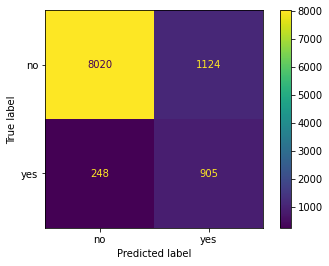

In [ ]:
# After SMOTE

logmodel.fit(X_train_sm,y_train_sm)
y_pred_l4=logmodel.predict(X_test)
y_pred_train_l4=logmodel.predict(X_train)

cm=confusion_matrix(y_test,y_pred_l4)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_l4))
print('Test set accuracy:',accuracy_score(y_test,y_pred_l4))
print(classification_report(y_test,y_pred_l4))



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
t1=tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree t1', tuning_tree.best_params_, tuning_tree.best_score_)
t2=tuning_tree.fit(X_train_ns,y_train_ns)
print('Best Parameter for Tree t2', tuning_tree.best_params_, tuning_tree.best_score_)
t3=tuning_tree.fit(X_train_os,y_train_os)
print('Best Parameter for Tree t3', tuning_tree.best_params_, tuning_tree.best_score_)
t4=tuning_tree.fit(X_train_sm,y_train_sm)
print('Best Parameter for Tree t4', tuning_tree.best_params_, tuning_tree.best_score_)


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree t1 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9117540893094926
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree t2 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 9} 0.7972055764981152
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree t3 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.9043387908061957
Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best Parameter for Tree t4 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9098308889235142


In [ ]:

dtree_1=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=101,max_features=None,min_samples_leaf=2,min_samples_split=2)
d1=dtree_1.fit(X_train,y_train)

dtree_2=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=101,max_features=None,min_samples_leaf=4,min_samples_split=2)
d2=dtree_2.fit(X_train_ns,y_train_ns)

dtree_3=DecisionTreeClassifier(criterion='gini',max_depth=9,random_state=101,max_features=None,min_samples_leaf=1,min_samples_split=2)
d3=dtree_3.fit(X_train_os,y_train_os)

dtree_4=DecisionTreeClassifier(criterion='gini',max_depth=9,random_state=101,max_features=None,min_samples_leaf=1,min_samples_split=3)
d4=dtree_4.fit(X_train_sm,y_train_sm)

y_pred_d1=d1.predict(X_test)
y_pred_train_d1=d1.predict(X_train)
y_pred_d2=d2.predict(X_test)
y_pred_train_d2=d2.predict(X_train)
y_pred_d3=d3.predict(X_test)
y_pred_train_d3=d3.predict(X_train)
y_pred_d4=d4.predict(X_test)
y_pred_train_d4=d4.predict(X_train)

Train set accuracy:  0.9188760480398822
Test set accuracy: 0.9095853161114887
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9144
           1       0.61      0.53      0.57      1153

    accuracy                           0.91     10297
   macro avg       0.78      0.74      0.76     10297
weighted avg       0.90      0.91      0.91     10297



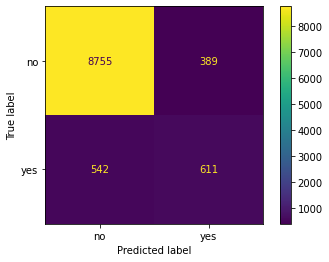

In [ ]:
cm=confusion_matrix(y_test,y_pred_d1)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_d1))
print('Test set accuracy:',accuracy_score(y_test,y_pred_d1))
print(classification_report(y_test,y_pred_d1))


Train set accuracy:  0.891003852254702
Test set accuracy: 0.8824900456443624
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      9144
           1       0.48      0.74      0.58      1153

    accuracy                           0.88     10297
   macro avg       0.72      0.82      0.76     10297
weighted avg       0.91      0.88      0.89     10297



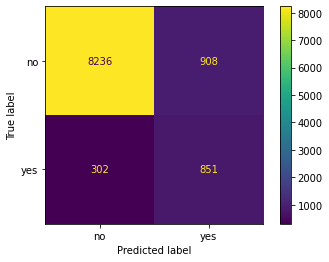

In [ ]:
cm=confusion_matrix(y_test,y_pred_d2)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_d2))
print('Test set accuracy:',accuracy_score(y_test,y_pred_d2))
print(classification_report(y_test,y_pred_d2))


Train set accuracy:  0.8728108510569421
Test set accuracy: 0.8555890065067495
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9144
           1       0.43      0.88      0.58      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.75     10297
weighted avg       0.92      0.86      0.88     10297



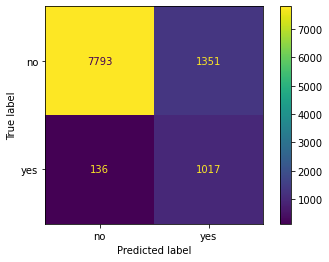

In [ ]:
cm=confusion_matrix(y_test,y_pred_d3)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_d3))
print('Test set accuracy:',accuracy_score(y_test,y_pred_d3))
print(classification_report(y_test,y_pred_d3))


Train set accuracy:  0.8912304554724677
Test set accuracy: 0.8686025055841508
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      9144
           1       0.45      0.81      0.58      1153

    accuracy                           0.87     10297
   macro avg       0.71      0.84      0.75     10297
weighted avg       0.92      0.87      0.88     10297



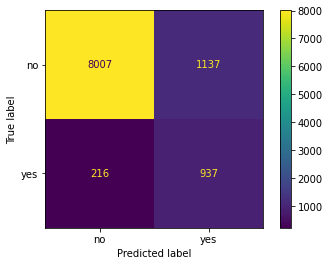

In [ ]:
cm=confusion_matrix(y_test,y_pred_d4)
cmd=ConfusionMatrixDisplay(cm,display_labels=['no','yes'])
cmd.plot()
print('Train set accuracy: ',accuracy_score(y_train,y_pred_train_d4))
print('Test set accuracy:',accuracy_score(y_test,y_pred_d4))
print(classification_report(y_test,y_pred_d4))


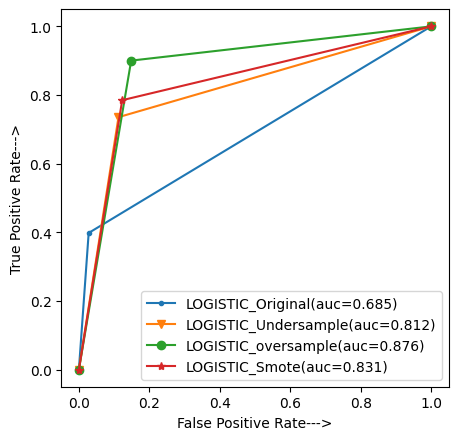

In [ ]:
from sklearn.metrics import roc_curve,auc

logistic_fpr_l1, logistic_tpr_l1,threshold_l1=roc_curve(y_test,y_pred_l1)
auc_logistic_l1=auc(logistic_fpr_l1, logistic_tpr_l1)

logistic_fpr_l2, logistic_tpr_l2,threshold_l2=roc_curve(y_test,y_pred_l2)
auc_logistic_l2=auc(logistic_fpr_l2, logistic_tpr_l2)

logistic_fpr_l3, logistic_tpr_l3,threshold_l3=roc_curve(y_test,y_pred_l3)
auc_logistic_l3=auc(logistic_fpr_l3, logistic_tpr_l3)

logistic_fpr_l4, logistic_tpr_l4,threshold_l4=roc_curve(y_test,y_pred_l4)
auc_logistic_l4=auc(logistic_fpr_l4, logistic_tpr_l4)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr_l1, logistic_tpr_l1,marker='.',label='LOGISTIC_Original(auc=%.3f)'%auc_logistic_l1)
plt.plot(logistic_fpr_l2, logistic_tpr_l2,marker='v',label='LOGISTIC_Undersample(auc=%.3f)'%auc_logistic_l2)
plt.plot(logistic_fpr_l3, logistic_tpr_l3,marker='o',label='LOGISTIC_oversample(auc=%.3f)'%auc_logistic_l3)
plt.plot(logistic_fpr_l4, logistic_tpr_l4,marker='*',label='LOGISTIC_Smote(auc=%.3f)'%auc_logistic_l4)

plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')
plt.legend()
plt.show()

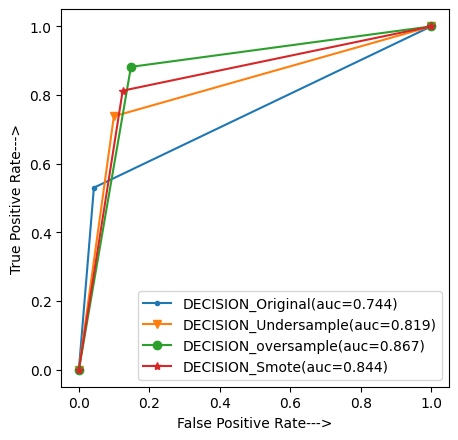

In [ ]:

decision_fpr_d1, decision_tpr_d1,threshold_d1=roc_curve(y_test,y_pred_d1)
auc_decision_d1=auc(decision_fpr_d1, decision_tpr_d1)

decision_fpr_d2, decision_tpr_d2,threshold_d2=roc_curve(y_test,y_pred_d2)
auc_decision_d2=auc(decision_fpr_d2, decision_tpr_d2)

decision_fpr_d3, decision_tpr_d3,threshold_d3=roc_curve(y_test,y_pred_d3)
auc_decision_d3=auc(decision_fpr_d3, decision_tpr_d3)

decision_fpr_d4, decision_tpr_d4,threshold_d4=roc_curve(y_test,y_pred_d4)
auc_decision_d4=auc(decision_fpr_d4, decision_tpr_d4)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(decision_fpr_d1, decision_tpr_d1,marker='.',label='DECISION_Original(auc=%.3f)'%auc_decision_d1)
plt.plot(decision_fpr_d2, decision_tpr_d2,marker='v',label='DECISION_Undersample(auc=%.3f)'%auc_decision_d2)
plt.plot(decision_fpr_d3, decision_tpr_d3,marker='o',label='DECISION_oversample(auc=%.3f)'%auc_decision_d3)
plt.plot(decision_fpr_d4, decision_tpr_d4,marker='*',label='DECISION_Smote(auc=%.3f)'%auc_decision_d4)

plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')
plt.legend()
plt.show()

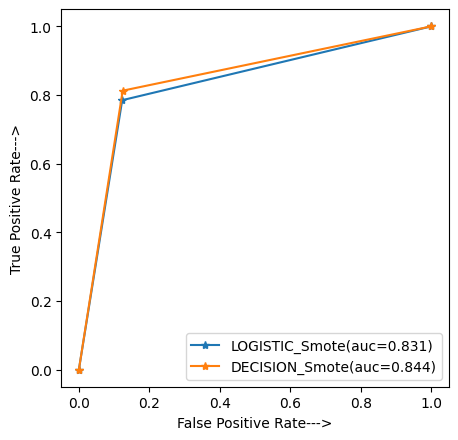

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr_l4, logistic_tpr_l4,marker='*',label='LOGISTIC_Smote(auc=%.3f)'%auc_logistic_l4)
plt.plot(decision_fpr_d4, decision_tpr_d4,marker='*',label='DECISION_Smote(auc=%.3f)'%auc_decision_d4)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')
plt.legend()
plt.show()

In [ ]:
print(d4.summary())

AttributeError: ignored

In [ ]:
from sklearn import tree

tree.plot_tree(d4)

In [ ]:
d4.get_params(deep=True)

In [ ]:
!pip install graphviz

!pip install pydotplus

In [ ]:
from six import StringIO

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(d4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train_sm.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Subscribed.png')
Image(graph.create_png())